<a href="https://colab.research.google.com/github/rysullivan54/QuarkNet/blob/main/RYS_muon_tracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muon Tracks in CMS  

Write code to expand the pseudocode below into an investigation of [muon track data](https://github.com/QuarkNet-HEP/coding-camp/tree/main/data) in the CMS detector using [Holmes' model-fitting technique](https://docs.google.com/document/d/1VP2fAFiVm1FqjqD4D-jRctjdIrMiSmBWAYw_cqBhxV0/edit?usp=sharing) and the [PPDAC](https://docs.google.com/document/d/1ei4PwZsl9aN9HnxFz7CxEtViHXxPwyd0OAogSLCrm8U/edit?usp=sharing) framework.

## Pseudocode

# fit a linear model to a set of muon tracks in CMS

The columns in the CMS data files are:

- E: energy, in GeV
- px, py, pz: cartesian components of momentum, in GeV/c
- pt: tranverse momentum (in the x-y plane, perpendicular to the beam pipe), in GeV/c
- phi: polar coordinate of the initial trajectory in the transverse plane, in radians
- eta: a function of the initial trajectory's angle with respect to the beam pipe (like theta), called pseudorapidity. Eta is a function of theta where eta = 0 is the transverseplane and eta = +/- infinity at the beam pipe
- Q: charge, in units of fundamental charge, e
- E1, px2, etc: properties of one of multiple particles detected
- MET: the event's missing transverse energy (in single lepton datasets), in GeV

In [1]:
# Input function libraries
import pandas as pd
import numpy as np
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Load muon track data
trackdata1 = pd.read_csv('https://raw.githubusercontent.com/QuarkNet-HEP/coding-camp/main/data/muon_track_3.csv', skiprows=2)
# trackdata1.columns = ['X','Y']
# trackdata1 = trackdata1.drop(labels=[0,1], axis=0)

trackdata1.head()

,x,y
0,-0.038012,0.025381
1,-0.356492,0.223704
2,-0.678912,0.412490
3,-1.005210,0.591778
4,-1.335360,0.761556


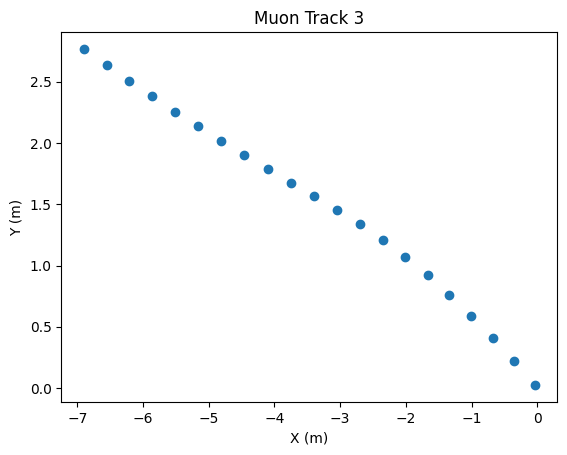

In [3]:
# Scatter plot the data
plt.scatter(trackdata1['x'], trackdata1['y'])
plt.title("Muon Track 3")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.grid(False);

In [4]:
# Define the linear model function
def my_model(x, m, b):   # first argument (x) is input data, scipy will optimize m & b to fit
    y = m * x + b
    return(y)

Then, Scipy's curve_fit will fit the model function to our data.


In [5]:
# Scipy's curve_fit takes the arguments (model function, x-values, y-values)
popt, pcov = curve_fit(my_model, trackdata1['x'], trackdata1['y'])

# popt and pcov are some properties of the curve fit we'll use next.
popt   # optimized coeeficients, in the order they appear in the model function

array([-0.37676745,  0.2171651 ])

The model function's optimized coefficients above are probably close to 2 and 1. Recall the original data looked like y=2x+1 (plus some random jitter). popt is an array and you can access just one of the array's elements (your optimized coefficients) like this:

In [6]:
# the first element in the array "popt". That's the first coefficient.
popt[0]

-0.37676744939957596

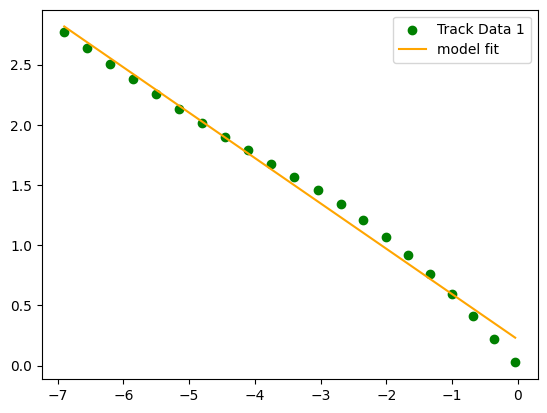

In [8]:
# plotting the original data and the optimized model (i.e., trendline)
plt.scatter(trackdata1['x'], trackdata1['y'], label="Track Data 1", color='g')
plt.plot(trackdata1['x'], my_model(trackdata1['x'], popt[0], popt[1]), label="model fit", color='orange')
plt.legend()
plt.show()

# fit another function that might give better physics insight

In [9]:
def my_model2(x, m, b):   # first argument (x) is input data, scipy will optimize m & b to fit
    y = m * x**2 + b
    return(y)

Then, Scipy's curve_fit will fit the model function to our data.


In [10]:
# Scipy's curve_fit takes the arguments (model function, x-values, y-values)
popt, pcov = curve_fit(my_model2, trackdata1['x'], trackdata1['y'])

# popt and pcov are some properties of the curve fit we'll use next.
popt   # optimized coeeficients, in the order they appear in the model function

array([0.04980239, 0.70502695])

In [11]:
# the first element in the array "popt". That's the first coefficient.
popt[0]

0.04980238921239974

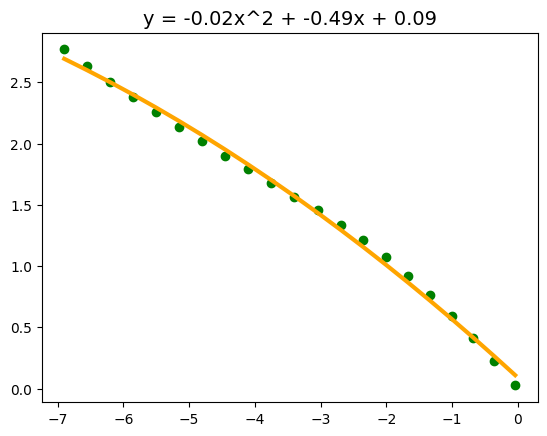

In [12]:
# Now we can fit the data to a polynominal fit
a, b, c = np.polyfit(trackdata1['x'], trackdata1['y'], deg=2)

# Notice we change the 'y' values to be the polynominal equation
plt.plot(trackdata1['x'], a*trackdata1['x']**2 + b*trackdata1['x'] + c, linewidth=3, color="orange")
plt.scatter(trackdata1['x'], trackdata1['y'], label="Track Data 1", color='g')

# Here we're putting the equation in the title
# but you know how to have this in the legend or as text too.
plt.title(f'y = {a:.2f}x^2 + {b:.2f}x + {c:.2f}', size=14)
plt.show()

In [22]:
def my_model3(x, a, b, c, d):
  y = a*x**3 + b*x**2 + c*x + d
  return y

In [23]:
popt, pcov = curve_fit(my_model3, trackdata1['x'], trackdata1['y'])

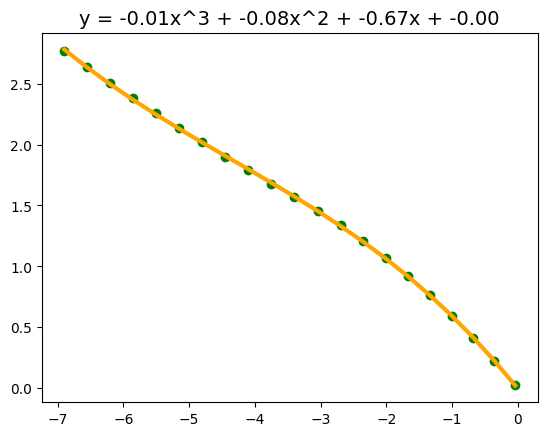

In [24]:
# Now we can fit the data to cubic fit
a, b, c, d = np.polyfit(trackdata1['x'], trackdata1['y'], deg=3)

# Notice we change the 'y' values to be the polynominal equation
plt.plot(trackdata1['x'], a*trackdata1['x']**3 + b*trackdata1['x']**2 + c*trackdata1['x'] + d, linewidth=3, color="orange")
plt.scatter(trackdata1['x'], trackdata1['y'], label="Track Data 1", color='g')

# Here we're putting the equation in the title
# but you know how to have this in the legend or as text too.
plt.title(f'y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f}', size=14)
plt.show()

# compare the two models using chi-sq or residual sum of squares (RSS)

In [25]:
# Define functions for comparison and analysis
def chi_sq(obs, exp, error):
    return np.sum(((obs - exp) / error)**2)

def rss(obs, exp):
    return np.sum((obs - exp)**2)

In [26]:
# Calculate expected values using my_model
exp_model1 = my_model(trackdata1['x'], popt[0], popt[1])

# Calculate expected values using my_model2
exp_model2 = my_model2(trackdata1['x'], popt[0], popt[1])

# Calculate expected values using my_model2
exp_model3 = my_model3(trackdata1['x'], popt[0], popt[1], popt[2], popt[3])

In [27]:
# Assume an error of 0.1 for all observations
error = 0.1

# Calculate chi-squared for each model
chi_sq_model1 = chi_sq(trackdata1['y'], exp_model1, error)
chi_sq_model2 = chi_sq(trackdata1['y'], exp_model2, error)
chi_sq_model3 = chi_sq(trackdata1['y'], exp_model3, error)
print("Chi-square for linear model:", chi_sq_model1)
print("Chi-square for quadratic model:", chi_sq_model2)
print("Chi-square for cubic model:", chi_sq_model3)

# Calculate RSS for each model
rss_model1 = rss(trackdata1['y'], exp_model1)
rss_model2 = rss(trackdata1['y'], exp_model2)
rss_model3 = rss(trackdata1['y'], exp_model3)
print("RSS for linear model:", rss_model1)
print("RSS for quadratic model:", rss_model2)
print("RSS for cubic model:", rss_model3)

Chi-square for linear model: 6442.6025345366415
Chi-square for quadratic model: 7664.660854219833
Chi-square for cubic model: 0.10630697795311472
RSS for linear model: 64.42602534536641
RSS for quadratic model: 76.64660854219834
RSS for cubic model: 0.0010630697795311471


In [ ]:
# perform analysis in both a spreadsheet and a Jupyter notebook

In [ ]:
# present using PPDAC framework